In [6]:
import os#环境代理设置
os.environ["http_proxy"] = "http://127.0.0.1:7890"
os.environ["https_proxy"] = "http://127.0.0.1:7890"

In [7]:
import torch
from torch import nn
import transformers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
torch.__version__

'2.4.1+cu121'

In [9]:
transformers.__version__

'4.46.3'

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [11]:
from datasets import load_dataset

### 处理数据集

In [12]:
emotions = load_dataset('emotion')

Using the latest cached version of the dataset since emotion couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'split' at /home/jiangzirou/.cache/huggingface/datasets/emotion/split/0.0.0/cab853a1dbdf4c42c2b3ef2173804746df8825fe (last modified on Thu Sep 11 04:26:43 2025).


In [13]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [14]:
emotions['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [15]:
emotions['train']['text'][5]

'ive been feeling a little burdened lately wasnt sure why that was'

In [16]:
len(emotions['train']['text'])

16000

In [17]:
emotions['train'].features['label']

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [18]:
labels = emotions['train'].features['label'].names
print(labels)

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


In [19]:
emotions_df = pd.DataFrame.from_dict(emotions['train'])

In [20]:
emotions_df.shape

(16000, 2)

In [21]:
emotions_df.columns

Index(['text', 'label'], dtype='object')

In [22]:
emotions_df[:5]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [23]:
emotions_df['label_name'] = emotions_df['label'].apply(lambda x: labels[x])

In [24]:
emotions_df[:5]

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [25]:
emotions_df.label_name.value_counts()

label_name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [26]:
emotions_df['words per tweet'] = emotions_df['text'].str.split().apply(len)

In [27]:
emotions_df['words per tweet']

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: words per tweet, Length: 16000, dtype: int64

### text => tokens
数据集转换为模型接受的输入类型


tokenizer

In [28]:
from transformers import AutoTokenizer

In [29]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [30]:
emotions_df.iloc[1]

text               i can go from feeling so hopeless to so damned...
label                                                              0
label_name                                                   sadness
words per tweet                                                   21
Name: 1, dtype: object

In [31]:
tokenizer.encode(emotions_df.iloc[1]['text'])

[101,
 1045,
 2064,
 2175,
 2013,
 3110,
 2061,
 20625,
 2000,
 2061,
 9636,
 17772,
 2074,
 2013,
 2108,
 2105,
 2619,
 2040,
 14977,
 1998,
 2003,
 8300,
 102]

In [32]:
def batch_tokenize(batch):
    return tokenizer(batch['text'],padding=True,truncation=True)

In [33]:
emotions_encoded = emotions.map(batch_tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [34]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [35]:
emotions_encoded['train']['input_ids'][:3]

[[101,
  1045,
  2134,
  2102,
  2514,
  26608,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  1045,
  2064,
  2175,
  2013,
  3110,
  2061,
  20625,
  2000,
  2061,
  9636,
  17772,
  2074,
  2013,
  2108,
  2105,
  2619,
  2040,
  14977,
  1998,
  2003,
  8300,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  10047,
  9775,
  1037,
  3371

转化为tensor

In [36]:
type(emotions_encoded['train']['input_ids'])

list

In [37]:
emotions_encoded.set_format('torch',columns=['label', 'input_ids', 'attention_mask'])

In [38]:
type(emotions_encoded['train']['input_ids'])

torch.Tensor

### fine-tune transformers

In [39]:
from transformers import AutoModel
model_ckpt = 'distilbert-base-uncased'
model = AutoModel.from_pretrained(model_ckpt)
model

/home/jiangzirou/data/miniconda3/envs/PyTroch/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [40]:
from transformers import AutoModelForSequenceClassification
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda')
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=len(labels)).to(device)
model

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [41]:
from transformers import TrainingArguments, Trainer

In [62]:
batch_size = 32
logging_steps = len(emotions_encoded['train']) // batch_size // 9
model_name = f'{model_ckpt}_emotion_ft_0911'
training_args = TrainingArguments(
    output_dir=model_name, 
    num_train_epochs=4, 
    learning_rate=2e-5,
    weight_decay=0.01,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    # write
    push_to_hub=True, 
    log_level="error"
    )

/home/jiangzirou/.local/lib/python3.8/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [63]:
def compute_metrics(eval_pred):
    from sklearn.metrics import accuracy_score, f1_score
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1': f1_score(labels, preds, average='weighted')
    }

In [64]:
trainer = Trainer(model=model, 
                  tokenizer=tokenizer,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  args=training_args, 
                  compute_metrics=compute_metrics)

/tmp/ipykernel_1955813/3510639406.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [65]:
trainer.train()

/home/jiangzirou/.local/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.120300,0.182523,0.925500,0.926400
2,0.094800,0.167601,0.933500,0.934112
3,0.081900,0.165913,0.936000,0.936411
4,0.080200,0.158695,0.933000,0.933177


/home/jiangzirou/.local/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/jiangzirou/.local/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/jiangzirou/.local/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/jiangzirou/.local/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, bu

TrainOutput(global_step=224, training_loss=0.09409443475306034, metrics={'train_runtime': 94.7318, 'train_samples_per_second': 675.591, 'train_steps_per_second': 2.365, 'total_flos': 1440685723392000.0, 'train_loss': 0.09409443475306034, 'epoch': 4.0})

In [66]:
preds_out = trainer.predict(emotions_encoded['validation'])
preds_out

/home/jiangzirou/.local/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


PredictionOutput(predictions=array([[ 6.4595523 , -1.0185404 , -1.2057253 , -1.437659  , -1.446803  ,
        -1.877994  ],
       [ 6.5674334 , -1.5367107 , -1.828149  , -1.1457305 , -0.91044384,
        -1.9092827 ],
       [-1.4644727 ,  3.5935361 ,  4.009163  , -2.0918727 , -2.429358  ,
        -2.0810752 ],
       ...,
       [-1.3899672 ,  6.540145  , -0.72723186, -1.6560385 , -1.7418    ,
        -1.6316446 ],
       [-2.1475058 ,  5.0315123 ,  2.9588678 , -1.8789744 , -2.4270878 ,
        -2.0393836 ],
       [-1.828293  ,  6.489039  , -0.39677155, -2.2088652 , -1.8185141 ,
        -0.9494422 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.158695250749588, 'test_accuracy': 0.933, 'test_f1': 0.9331771652528152, 'test_runtime': 1.5412, 'test_samples_per_second': 1297.687, 'test_steps_per_second': 4.542})

In [67]:
y_preds = np.argmax(preds_out.predictions, axis=-1)
y_true = emotions_encoded['validation']['label']

In [68]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

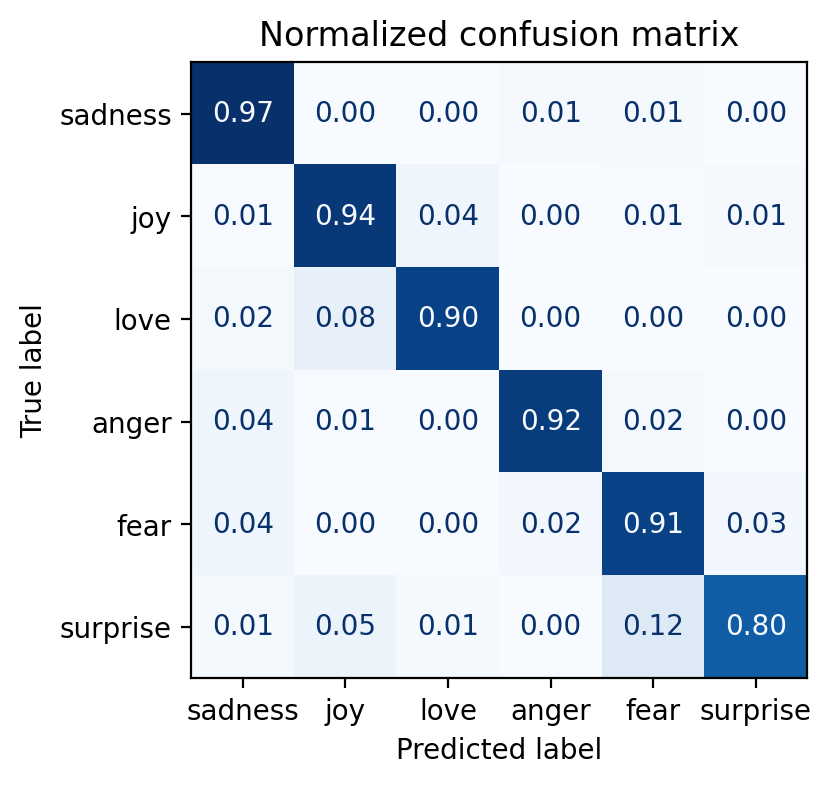

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix") 


plot_confusion_matrix(y_preds, y_true, labels)

In [72]:
preds_out = trainer.predict(emotions_encoded['test'])

/home/jiangzirou/.local/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


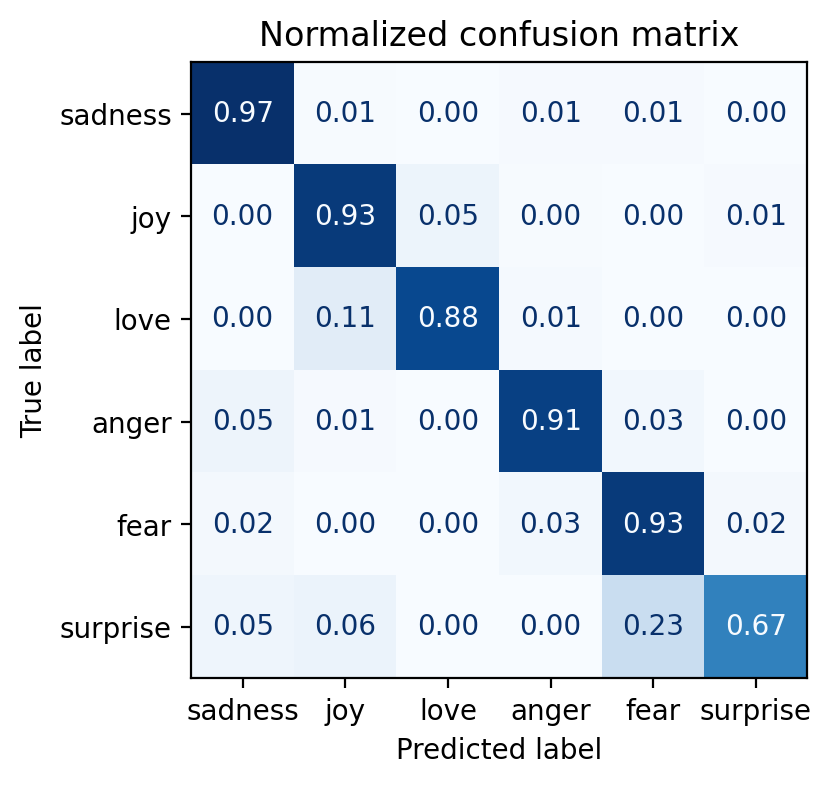

In [79]:
y_preds = np.argmax(preds_out.predictions, axis=-1)
y_true = emotions_encoded['test']['label']
plot_confusion_matrix(y_preds, y_true, labels)

In [93]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis = -1)
        loss = cross_entropy(output.logits, batch['label'].to(device),reduction='none')
    return {"loss": loss.cpu().numpy(),
            "pred_label": pred_label.cpu().numpy()
            }

In [92]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [96]:
emotions_encoded["validation"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'pred_label'],
    num_rows: 2000
})

In [94]:
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [102]:
valid_df = pd.DataFrame.from_dict({'text': emotions_encoded["validation"]['text'], 
                                   'label': emotions_encoded['validation']['label'].numpy(), 
                                   'pred_label': emotions_encoded['validation']['pred_label'].numpy(), 
                                   'loss': emotions_encoded["validation"]['loss'].numpy()})
valid_df['label'] = valid_df['label'].apply(lambda x: labels[x])
valid_df['pred_label'] = valid_df['pred_label'].apply(lambda x: labels[x])

In [103]:
valid_df

,text,label,pred_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.002012
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.001747
2,i feel like a faithful servant,love,love,0.512960
3,i am just feeling cranky and blue,anger,anger,0.003825
4,i can have for a treat or if i am feeling festive,joy,joy,0.001760
...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,sadness,0.003590
1996,i constantly worry about their fight against n...,joy,joy,0.001916
1997,i feel its important to share this info for th...,joy,joy,0.001867
1998,i truly feel that if you are passionate enough...,joy,joy,0.121367


In [104]:
valid_df[valid_df['label'] != valid_df['pred_label']]

,text,label,pred_label,loss
17,i know what it feels like he stressed glaring ...,anger,sadness,2.397201
27,i feel as if i am the beloved preparing hersel...,joy,love,0.886852
35,i am feeling very blessed today that they shar...,joy,love,1.377511
60,i miss our talks our cuddling our kissing and ...,love,joy,0.709948
83,i feel stressed or my family is being negative...,sadness,anger,0.760570
...,...,...,...,...
1958,i so desperately want to be able to help but i...,fear,sadness,1.504832
1961,i feel more well rested though my sinuses stil...,joy,sadness,3.589219
1963,i called myself pro life and voted for perry w...,joy,sadness,4.852226
1964,i feel vaguely cheated and a little amused,joy,anger,3.546336


In [106]:
valid_df[valid_df['label'] != valid_df['pred_label']].label.value_counts()

label
joy         44
anger       21
fear        20
love        17
sadness     16
surprise    16
Name: count, dtype: int64

to huggingface hub

In [107]:
trainer.push_to_hub(commit_message="Training completed")

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...d_emotion_ft_0911/training_args.bin: 100%|##########| 5.30kB / 5.30kB            

  ...d_emotion_ft_0911/model.safetensors:  12%|#2        | 33.5MB /  268MB            

CommitInfo(commit_url='https://huggingface.co/jzr778/distilbert-base-uncased_emotion_ft_0911/commit/7ca6ea170b0c4c71292bff2b26ef150bd934cb61', commit_message='Training completed', commit_description='', oid='7ca6ea170b0c4c71292bff2b26ef150bd934cb61', pr_url=None, repo_url=RepoUrl('https://huggingface.co/jzr778/distilbert-base-uncased_emotion_ft_0911', endpoint='https://huggingface.co', repo_type='model', repo_id='jzr778/distilbert-base-uncased_emotion_ft_0911'), pr_revision=None, pr_num=None)

In [108]:
from transformers import pipeline

model_id = 'jzr778/distilbert-base-uncased_emotion_ft_0911'
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [112]:
custom_tweet = "my cat die."
preds = classifier(custom_tweet, return_all_scores=True)
preds

[[{'label': 'LABEL_0', 'score': 0.8422213196754456},
  {'label': 'LABEL_1', 'score': 0.008246813900768757},
  {'label': 'LABEL_2', 'score': 0.0021661780774593353},
  {'label': 'LABEL_3', 'score': 0.12047220766544342},
  {'label': 'LABEL_4', 'score': 0.024926720187067986},
  {'label': 'LABEL_5', 'score': 0.0019667583983391523}]]